In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PurchaseFrequency': [6, 2, 2, 1, 7, 3, 5, 3, 2, 9],
    'AmountSpent': [600, 550, 500, 50, 200, 100, 320, 450, 780, 250],
    'ProductTypes': [3, 5, 5, 1, 4, 2, 3, 1, 8, 4]
}

In [4]:

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

Original Dataset:
   CustomerID  PurchaseFrequency  AmountSpent  ProductTypes
0           1                  6          600             3
1           2                  2          550             5
2           3                  2          500             5
3           4                  1           50             1
4           5                  7          200             4
5           6                  3          100             2
6           7                  5          320             3
7           8                  3          450             1
8           9                  2          780             8
9          10                  9          250             4


In [5]:
scaler = StandardScaler()
df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']] = scaler.fit_transform(df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']])


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']])

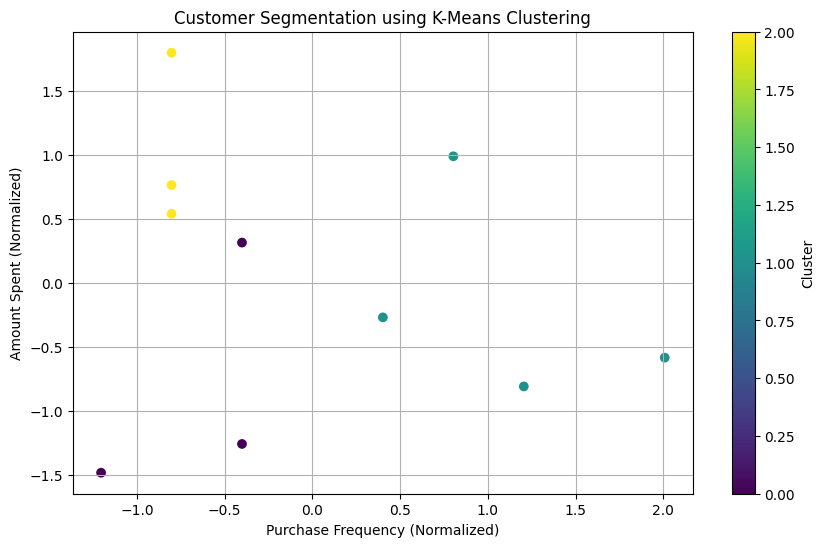

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PurchaseFrequency'], df['AmountSpent'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Purchase Frequency (Normalized)')
plt.ylabel('Amount Spent (Normalized)')
plt.title('Customer Segmentation using K-Means Clustering')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [8]:
inertia = kmeans.inertia_

silhouette_avg = silhouette_score(df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']], df['Cluster'])

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')

print("\nFinal DataFrame with Cluster Assignments:")
print(df)

Inertia: 8.474896797183224
Silhouette Score: 0.40475556087013187

Final DataFrame with Cluster Assignments:
   CustomerID  PurchaseFrequency  AmountSpent  ProductTypes  Cluster
0           1           0.803219     0.987033     -0.298511        1
1           2          -0.803219     0.762708      0.696526        2
2           3          -0.803219     0.538382      0.696526        2
3           4          -1.204829    -1.480550     -1.293548        0
4           5           1.204829    -0.807573      0.199007        1
5           6          -0.401610    -1.256224     -0.796030        0
6           7           0.401610    -0.269191     -0.298511        1
7           8          -0.401610     0.314056     -1.293548        0
8           9          -0.803219     1.794606      2.189082        2
9          10           2.008048    -0.583247      0.199007        1
